# HomeWork 7

**DeadLine : 12:00 PM 19 Aban 1399**

**Total points : 165 pts**

# PART 1

# PART 2

# PART 3

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 5A

Here is for your helper functions(optional)

Implement these functions for converting color spaces.

In [3]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here

    out_img=cv2.cvtColor(out_img,cv2.COLOR_BGR2HSV)
    
    return out_img

def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    
    out_img=cv2.cvtColor(out_img,cv2.COLOR_BGR2YCrCb)
    
    return out_img

Test your implementation (dont change this cell)

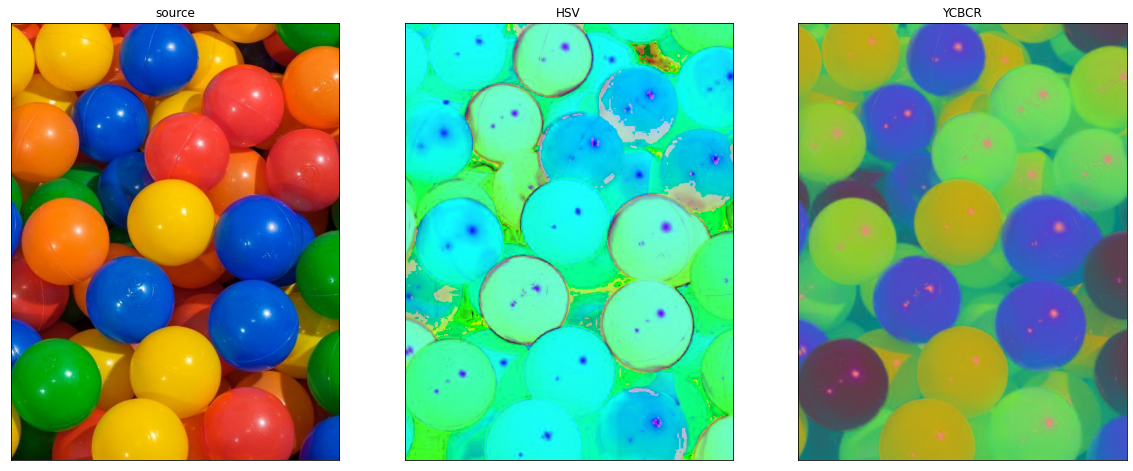

In [4]:
image_list = []

image = cv2.imread(os.path.join('images', '5.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2A')

# PART 5B

Here is for your helper functions(optional)

Implement this function to get differences between two images.

In [5]:
def get_dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    
    out_img = image1.copy()
    
    #Write your code here
    # convert to 3 equal channels
    out_img = cv2.merge((out_img, out_img, out_img))
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            out_img[i,j]=out_img[i,j]*[1,0,0]
            
    out_img2 = image2.copy()
    out_img2 = cv2.merge((out_img2, out_img2, out_img2))
    for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            out_img2[i,j]=out_img2[i,j]*[0,1,1]
            
    result= out_img2+out_img       
    return result

Test your implementation (dont change this cell)

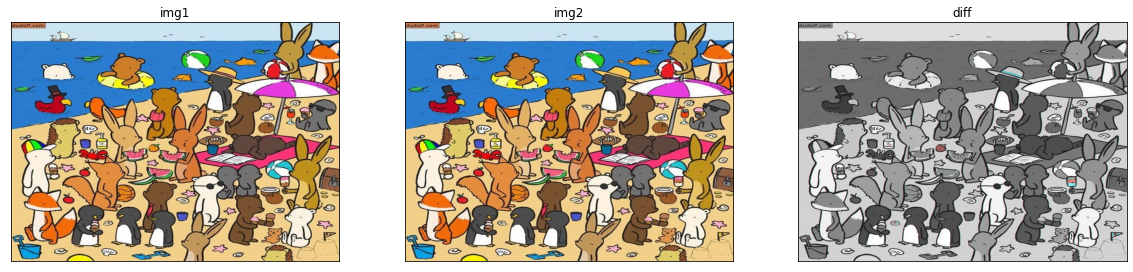

In [6]:
image_list = []

image1 = cv2.imread(os.path.join('images', '5b1.jpg'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images', '5b2.jpg'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images', '5b1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '5b2.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([get_dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')

# PART 6

Here is for your helper functions(optional)

Implement this function to process the input frame.

In [7]:
def process_frame(frame):
    '''
    Converts red circles in the input image to white circles.
    
    Parameters:
        frame (numpy.ndarray): The input frame.
    
    Returns:
        numpy.ndarray: The result output frame.
    '''
    
    result = frame.copy()
    
    #Write your code here
    img_hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join  masks
    mask = mask0+mask1

    # set  output img to zero everywhere except the mask
    output_img = frame.copy()
    output_img[np.where(mask==255)] = 255


            
    return output_img

Test your implementation (dont change this cell)

In [8]:
cap = cv2.VideoCapture('balls.mp4')

frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('balls_processed.mp4',  
                         cv2.VideoWriter_fourcc(*'DIVX'), 
                         fps, size) 

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(process_frame(frame))
    else:
        break
out.release()
cap.release()

In [9]:
from IPython.display import HTML

text =  """
<table>
<tr>
    <td>
        <h3>Input</h3>
        <video alt="input" width="400" height="240" autoplay>
            <source src="balls.mp4" type="video/mp4">
        </video>
    </td>
    <td>
      <h3>Processed</h3>
      <video alt="output" width="400" height="240" autoplay>
            <source src="balls_processed.mp4" type="video/mp4">
      </video>
    </td>
</tr>
</table>

"""
HTML(text)

Input,Processed


# PART 7

Here is for your helper functions(optional)

In [10]:
def gradient_x(img):
    ##Sobel operator kernels
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return cv2.filter2D(img,-1,kernel_x)

def gradient_y(img):
    ##Sobel operator kernels
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return cv2.filter2D(img,-1,kernel_y)

def gaussian_kernel(size, sigma=1):
    gaussian = None
    gaussian = np.zeros((size,size), np.float)
    coe=1/(2*((np.pi)*(sigma**2)))
    co2_std=2*(sigma**2)
    for i in range(size):
        for j in range(size):
            gaussian[i,j]+=(coe*np.exp((-(i**2+j**2)/co2_std)))
    return gaussian


Implement this function for Harris detection.

In [11]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    I_x = gradient_x(np.float32(gray))
    I_y = gradient_y(np.float32(gray))
    kernel_size=3
    sigma=1
    kernel=gaussian_kernel(kernel_size,sigma)
    img_smoothed = cv2.filter2D(np.float32(image),-1,np.float32(kernel))
    
    Ixx = cv2.filter2D(np.float32(I_x**2),-1,np.float32(kernel))
    Ixy = cv2.filter2D(np.float32(I_y*I_x),-1,np.float32(kernel))
    Iyy = cv2.filter2D(np.float32(I_y**2),-1,np.float32(kernel))
    
    k=0.05
    
    # determinant
    detA = Ixx * Iyy - Ixy ** 2
    # trace
    traceA = Ixx + Iyy
    
    harris_response = detA - k * (traceA ** 2)

    max_val=np.argmax(harris_response)/10
    for rowindex, response in enumerate(harris_response):
        for colindex, r in enumerate(response):
            if r > max_val:
                # this is a corner
                cv2.circle(out_img,(rowindex, colindex),2,(255,0,0), -1)

    return out_img

dont change this cell!!

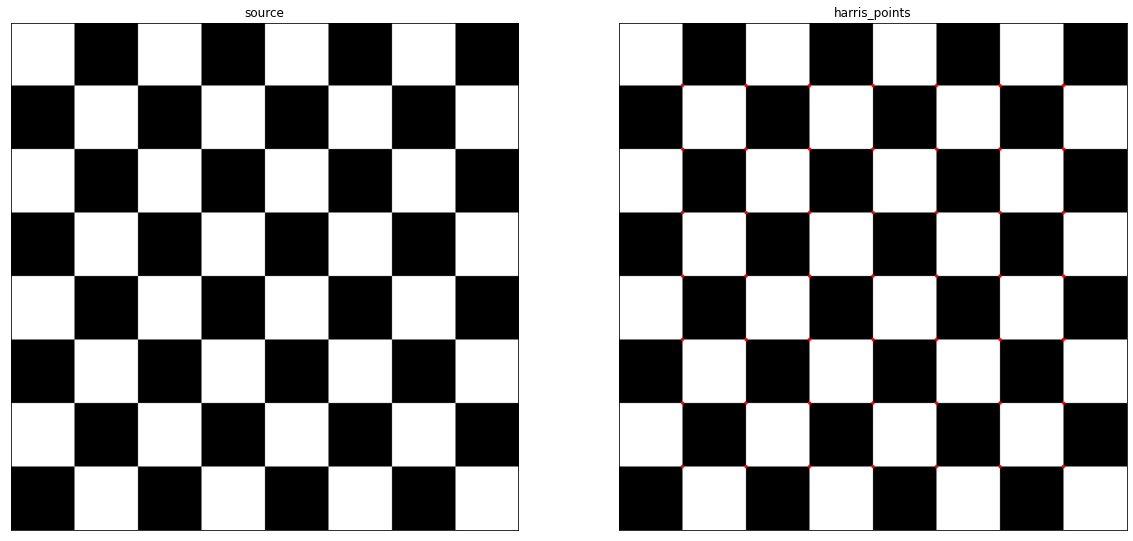

In [12]:
image_list = []

image = cv2.imread(os.path.join('images', '7.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([harris_points(image), 'harris_points', 'img'])

plotter(image_list,1 , 2, True, 20, 10, '7')

for create proper files for sending in quera run this cell.

In [13]:
!python notebook_converter.py

End!!!